In [22]:
from matplotlib.path import Path
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import matplotlib.patches as patches
from salishsea_tools import viz_tools, geo_tools, tidetools
from bathy_helpers import *
from scipy.optimize import curve_fit

In [2]:
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')

In [3]:
Jul = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/monthlong/ariane_trajectories_qualitative.nc')
Jul_latt = Jul.variables['traj_lat']
Jul_lont = Jul.variables['traj_lon']
Oct = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/Oct16/ariane_trajectories_qualitative.nc')
Oct_latt = Oct.variables['traj_lat']
Oct_lont = Oct.variables['traj_lon']
Jan = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/Jan17/ariane_trajectories_qualitative.nc')
Jan_latt = Jan.variables['traj_lat']
Jan_lont = Jan.variables['traj_lon']
Apr = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/Apr17/ariane_trajectories_qualitative.nc')
Apr_latt = Apr.variables['traj_lat']
Apr_lont = Apr.variables['traj_lon']

In [4]:
with nc.Dataset('/home/mdunphy/MEOPAR/NEMO-forcing/grid/coordinates_seagrid_SalishSea201702.nc', 'r') as cnc:
    glamf = cnc.variables['glamf'][0,...]; gphif = cnc.variables['gphif'][0,...]
    glamt = cnc.variables['glamt'][0,...]; gphit = cnc.variables['gphit'][0,...]
NY, NX = glamt.shape[0], glamt.shape[1]
glamfe, gphife = expandf(glamf, gphif)

In [23]:
def still_inside(il, ir, jl, jr, lont, latt):
    p = makebox(glamfe,gphife,il,ir,jl,jr)
    poly = path.Path(p, closed=True) 
    time, particles = lont.shape
    number_of_particles = np.zeros(time)
    for l in range(time):
        cx = lont[l,:]
        cy = latt[l,:]
        pts = np.array([cx,cy]).T
        test = poly.contains_points(pts)
        number_of_particles[l]= sum(test)
    return number_of_particles
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [6]:
Jul_all = still_inside(118,134,598,658,Jul_lont, Jul_latt)
Oct_all = still_inside( 118,134,598,658,Oct_lont, Oct_latt)
Jan_all = still_inside( 118,134,598,658, Jan_lont, Jan_latt)
Apr_all = still_inside( 118,134,598,658, Apr_lont, Apr_latt)

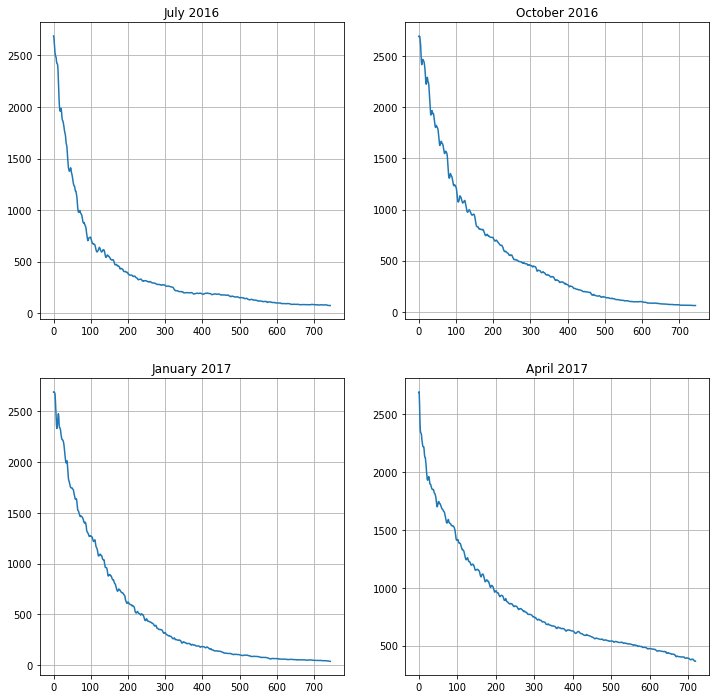

In [7]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(range(744), Jul_all)
ax[0,0].grid('on')
ax[0,0].set_title('July 2016')
ax[0,1].plot(range(744), Oct_all)
ax[0,1].grid('on')
ax[0,1].set_title('October 2016')
ax[1,0].plot(range(744), Jan_all)
ax[1,0].grid('on')
ax[1,0].set_title('January 2017')
ax[1,1].plot(range(720), Apr_all)
ax[1,1].grid('on')
ax[1,1].set_title('April 2017')

In [24]:
popt1, pcov1 = curve_fit(func, range(744), Jul_all)
popt2, pcov2 = curve_fit(func, range(744), Oct_all)
popt3, pcov3 = curve_fit(func, range(744), Jan_all)
popt4, pcov4 = curve_fit(func, range(720), Apr_all)
print(popt1[1], popt2[1], popt3[1], popt4[1])

0.013312367448 0.00702111856488 0.00738105843733 0.006068298108


/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: overflow encountered in exp
/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: overflow encountered in multiply


In [9]:
def deep_particles(lont,latt,init_z, il, ir, jl, jr):
    mask = lont[:].mask
    p = makebox(glamfe,gphife,il,ir,jl,jr)
    poly = path.Path(p, closed=True) 
    time, particles = lont.shape
    number_of_particles = np.zeros(time)
    index_deep_particles=[]
    for n in range(particles):
        if init_z[n] > 6:
            index_deep_particles.append(n)
    number_of_deep_particles = np.zeros(time)
    for n in range(time):
        for m in index_deep_particles:
            if (mask[n,m]) == False: 
                tf = poly.contains_point(np.array((lont[n,m], latt[n,m])).T)
                if tf == True:
                    number_of_deep_particles[n] = number_of_deep_particles[n] + 1
    return number_of_deep_particles

In [10]:
Jul_init_z = Jul.variables['init_z']
Jul_deep = deep_particles(Jul_lont,Jul_latt,Jul_init_z, 118,134,598,658)

In [20]:
Oct_deep = deep_particles(Oct_lont, Oct_latt, Oct.variables['init_z'], 118,134,598,658)
Jan_deep = deep_particles(Jan_lont, Jan_latt, Jan.variables['init_z'], 118,134,598,658)
Apr_deep = deep_particles(Apr_lont, Apr_latt, Apr.variables['init_z'], 118,134,598,658)

In [25]:
popt1, pcov1 = curve_fit(func, range(744), Jul_deep)
popt2, pcov2 = curve_fit(func, range(744), Oct_deep)
popt3, pcov3 = curve_fit(func, range(744), Jan_deep)
popt4, pcov4 = curve_fit(func, range(720), Apr_deep)
print(popt1[1], popt2[1], popt3[1], popt4[1])

0.00938672308606 0.00520371473861 0.00631939433674 0.00444249938541


/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: overflow encountered in exp
/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: overflow encountered in multiply


# Deep Particles

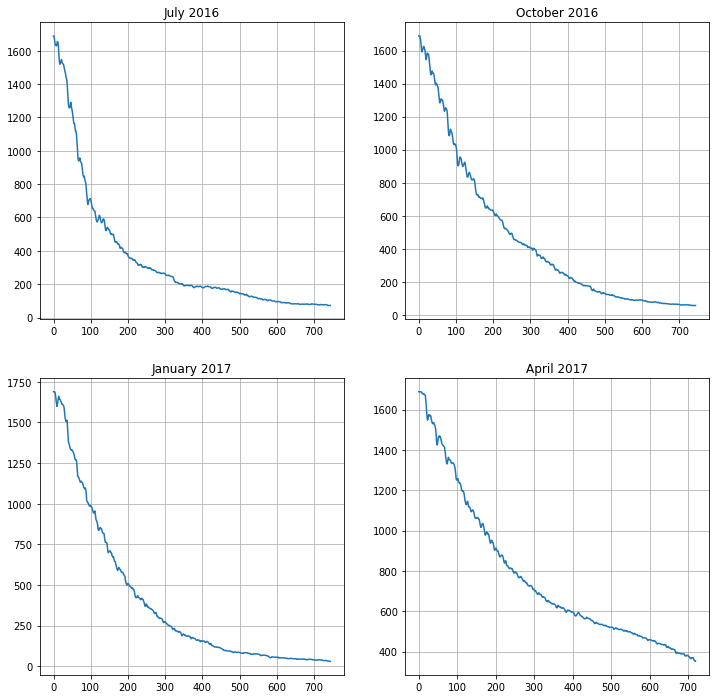

In [21]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(range(744), Jul_deep)
ax[0,0].grid('on')
ax[0,0].set_title('July 2016')
ax[0,1].plot(range(744), Oct_deep)
ax[0,1].grid('on')
ax[0,1].set_title('October 2016')
ax[1,0].plot(range(744), Jan_deep)
ax[1,0].grid('on')
ax[1,0].set_title('January 2017')
ax[1,1].plot(range(720), Apr_deep)
ax[1,1].grid('on')
ax[1,1].set_title('April 2017')

In [14]:
def shallow_particles(lont,latt,init_z, il, ir, jl, jr):
    mask = lont[:].mask
    p = makebox(glamfe,gphife,il,ir,jl,jr)
    poly = path.Path(p, closed=True) 
    time, particles = lont.shape
    number_of_particles = np.zeros(time)
    index_shallow_particles=[]
    for n in range(particles):
        if init_z[n] < 6:
            index_shallow_particles.append(n)
    number_of_shallow_particles = np.zeros(time)
    for n in range(time):
        for m in index_shallow_particles:
            if (mask[n,m]) == False: 
                tf = poly.contains_point(np.array((lont[n,m], latt[n,m])).T)
                if tf == True:
                    number_of_shallow_particles[n] = number_of_shallow_particles[n] + 1
    return number_of_shallow_particles

In [16]:
Jul_shallow = shallow_particles(Jul_lont,Jul_latt,Jul_init_z, 118,134,598,658)

In [17]:
Oct_shallow = shallow_particles(Oct_lont, Oct_latt, Oct.variables['init_z'], 118,134,598,658)
Jan_shallow = shallow_particles(Jan_lont, Jan_latt, Jan.variables['init_z'], 118,134,598,658)
Apr_shallow = shallow_particles(Apr_lont, Apr_latt, Apr.variables['init_z'], 118,134,598,658)

In [26]:
popt1, pcov1 = curve_fit(func, range(744), Jul_shallow)
popt2, pcov2 = curve_fit(func, range(744), Oct_shallow)
popt3, pcov3 = curve_fit(func, range(744), Jan_shallow)
popt4, pcov4 = curve_fit(func, range(720), Apr_shallow)
print(popt1[1], popt2[1], popt3[1], popt4[1])

0.0477171923198 0.0168576455435 0.0116684542319 0.0175410963106


/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: overflow encountered in exp
/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: overflow encountered in multiply


# Shallow particles

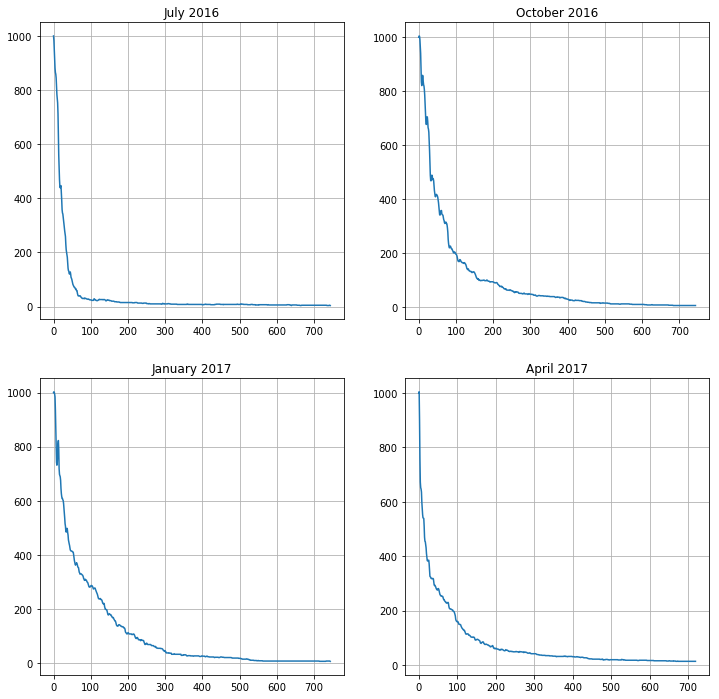

In [19]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(range(744), Jul_shallow)
ax[0,0].grid('on')
ax[0,0].set_title('July 2016')
ax[0,1].plot(range(744), Oct_shallow)
ax[0,1].grid('on')
ax[0,1].set_title('October 2016')
ax[1,0].plot(range(744), Jan_shallow)
ax[1,0].grid('on')
ax[1,0].set_title('January 2017')
ax[1,1].plot(range(720), Apr_shallow)
ax[1,1].grid('on')
ax[1,1].set_title('April 2017')